# Differences in VIP & SST neural populations

In this notebook, we use various analyses to try to find out whether there are differences between VIP and SST neural populations and, if so, what these differences are. 
As we have already seen, the VIP and SST neural populations can be seen as an interplay or control system which, among other things, maintains the balance in the brain, so further analyses are very interesting (see also `vip_sst_neurons.md`).

## Import & Data Processing

In [1]:
# install dependencies

!pip install pandas --quiet
!pip install pyarrow 
!pip install seaborn --quiet
!pip install requests

   ---------------------------------------- 0.0/25.5 MB ? eta -:--:--
   --- ------------------------------------ 2.4/25.5 MB 13.4 MB/s eta 0:00:02
   ---- ----------------------------------- 3.1/25.5 MB 13.2 MB/s eta 0:00:02
   ---- ----------------------------------- 3.1/25.5 MB 13.2 MB/s eta 0:00:02
   ---- ----------------------------------- 3.1/25.5 MB 13.2 MB/s eta 0:00:02
   ---- ----------------------------------- 3.1/25.5 MB 13.2 MB/s eta 0:00:02
   ---- ----------------------------------- 3.1/25.5 MB 13.2 MB/s eta 0:00:02
   ---- ----------------------------------- 3.1/25.5 MB 13.2 MB/s eta 0:00:02
   ---- ----------------------------------- 3.1/25.5 MB 13.2 MB/s eta 0:00:02
   ---- ----------------------------------- 3.1/25.5 MB 13.2 MB/s eta 0:00:02
   ---- ----------------------------------- 3.1/25.5 MB 13.2 MB/s eta 0:00:02
   ---- ----------------------------------- 3.1/25.5 MB 13.2 MB/s eta 0:00:02
   ---- ----------------------------------- 3.1/25.5 MB 13.2 MB/s eta 0:

In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [3]:
# data retrieval
import os, requests

fname = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
url = "https://ndownloader.figshare.com/files/28470255"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [4]:
# store the data as a pandas dataframe
filename = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
data = pd.read_parquet(filename)

In [5]:
# inspect the data 
# as we work with the pre processed file, the data only contains the vip and sst neural populations
pd.set_option("display.max_columns", None)
data.sample(5)

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,image_name,image_index,is_change,omitted,mean_running_speed,mean_pupil_area,response_latency,rewarded,ophys_experiment_id,imaging_depth,targeted_structure,cre_line,session_type,session_number,mouse_id,ophys_session_id,ophys_container_id,behavior_session_id,full_genotype,reporter_line,driver_line,indicator,sex,age_in_days,exposure_level
608354,2073,1086501538,"[0.01927158236503601, -0.05969213321805, 0.048...","[-1.2279815442797712, -1.1956662404829352, -1....",0.005364,0.003647,omitted,8,False,True,-0.060746,3569.258037,NaN,False,993862120,175,VISp,Vip-IRES-Cre,OPHYS_4_images_A,4.0,489066,993668836,991913246,993691759,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,F,129.0,novel
1231508,3728,1086567017,"[0.26466378569602966, 0.030856186524033546, 0....","[-1.2281906028244671, -1.1958697974869812, -1....",0.016521,0.024473,im054,5,True,False,3.738120,7910.495285,NaN,False,1004405226,175,VISp,Vip-IRES-Cre,OPHYS_3_images_B,3.0,492395,1004317427,1000740620,1004344898,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,F,162.0,familiar
1156834,741,1086557082,"[-0.044393379241228104, 0.0316426157951355, -0...","[-1.2281906028244671, -1.1958697974869812, -1....",-0.001479,-0.028631,omitted,8,False,True,0.157272,5058.335805,NaN,False,1004405226,175,VISp,Vip-IRES-Cre,OPHYS_3_images_B,3.0,492395,1004317427,1000740620,1004344898,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,F,162.0,familiar
1163201,996,1086567897,"[-0.04627765715122223, -0.05416109412908554, 0...","[-1.2281906028244671, -1.1958697974869812, -1....",0.195977,-0.023377,im035,7,True,False,-1.527644,6605.610394,NaN,False,1004405226,175,VISp,Vip-IRES-Cre,OPHYS_3_images_B,3.0,492395,1004317427,1000740620,1004344898,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,F,162.0,familiar
1214870,3063,1086556416,"[-0.007173431571573019, 0.07187602669000626, -...","[-1.2281906028244671, -1.1958697974869812, -1....",0.023096,-0.002332,im075,2,True,False,16.197693,7762.219840,NaN,False,1004405226,175,VISp,Vip-IRES-Cre,OPHYS_3_images_B,3.0,492395,1004317427,1000740620,1004344898,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,F,162.0,familiar


## How do VIP and SST neural populations differ in their responses to rewarded and non-rewarded stimuli?

As we already know, VIP and SST neurons fulfil different roles:
- VIP neurons are involved in disinhibition mechanisms, facilitating the activity of excitatory neurons in certain contexts, such as attention, learning, or reward processing.
- SST neurons, on the other hand, contribute to network stabilization by inhibiting pyramidal neurons, which suggests they may play a less direct role in reward processing.

Given these functional differences, we hypothesized that VIP and SST neurons differ in their reactions. To test this, we analyze the mean neuronal response (mean_response) in rewarded `(rewarded=True)` and non-rewarded `(rewarded=False)` conditions for both populations.

In [39]:
# create two datasets, one for vip and one for sst
vip_data = data[data['cre_line'].str.contains('Vip')]
sst_data = data[data['cre_line'].str.contains('Sst')]

In [ ]:
# standardize by mouse
vip_data['standardized_response'] = vip_data.groupby(['mouse_id'])['mean_response'].transform(lambda x: (x - x.mean()) / x.std())
sst_data['standardized_response'] = sst_data.groupby(['mouse_id'])['mean_response'].transform(lambda x: (x - x.mean()) / x.std())

C:\Users\iside\AppData\Local\Temp\ipykernel_28744\3828652815.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vip_data['standardized_response'] = vip_data.groupby(['mouse_id'])['mean_response'].transform(lambda x: (x - x.mean()) / x.std())
C:\Users\iside\AppData\Local\Temp\ipykernel_28744\3828652815.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sst_data['standardized_response'] = sst_data.groupby(['mouse_id'])['mean_response'].transform(lambda x: (x - x.mean()) / x.std())


In [41]:
# for each group calculate the mean response to rewarded and non-rewarded stimuli along with the standard deviation and sample size
rewarded_vip = vip_data.groupby('rewarded')['standardized_response'].agg(['mean', 'std', 'count']).reset_index()
rewarded_sst = sst_data.groupby('rewarded')['standardized_response'].agg(['mean', 'std', 'count']).reset_index()

# standard error of the mean
def calculate_sem(row):
    return row['std'] / (row['count'] ** 0.5)

rewarded_vip['sem'] = rewarded_vip.apply(calculate_sem, axis=1)
rewarded_sst['sem'] = rewarded_sst.apply(calculate_sem, axis=1)

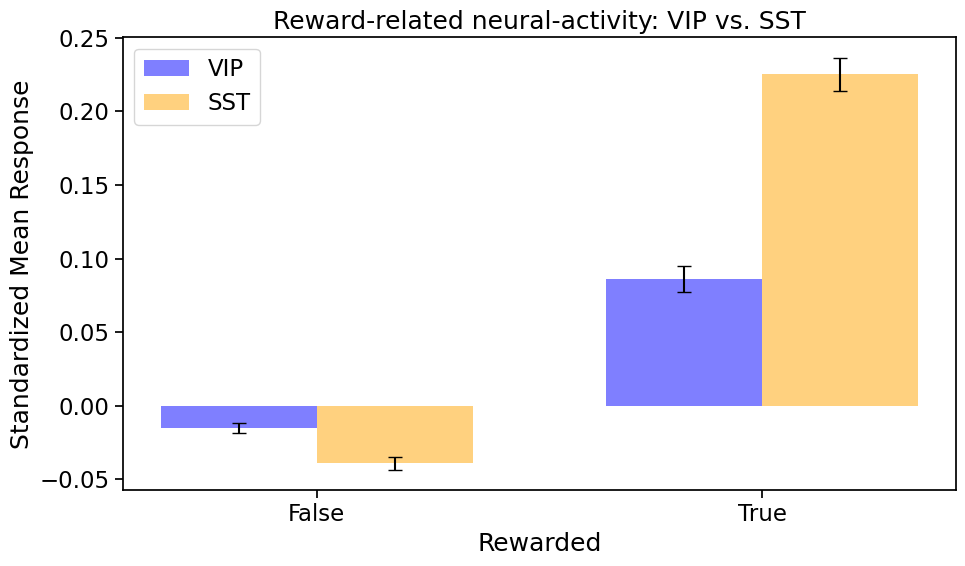

In [42]:
# visualize the reward-related neural activity
plt.figure(figsize=(10, 6))

bar_width = 0.35
x = np.arange(len(rewarded_vip['rewarded']))

# vip
plt.bar(x - bar_width/2, rewarded_vip['mean'], yerr=rewarded_vip['sem'], 
        width=bar_width, label='VIP', color='blue', alpha=0.5, capsize=5)

# ssi
plt.bar(x + bar_width/2, rewarded_sst['mean'], yerr=rewarded_sst['sem'], 
        width=bar_width, label='SST', color='orange', alpha=0.5, capsize=5)

plt.xlabel('Rewarded')
plt.ylabel('Standardized Mean Response')
plt.title('Reward-related neural-activity: VIP vs. SST')
plt.xticks(x, ['False', 'True'])
plt.legend()
plt.tight_layout()
plt.show()

1. The standardised mean response of VIP neurons is positive for rewarded stimuli. This shows that VIP neurons show a strong relative increase in activity with rewarded stimuli compared to baseline activity (which is 0 due to standardisation).
The standardised response of VIP neurons is almost neutral (approx. 0) for unrewarded stimuli. This means that there is no significant change in their activity compared to the baseline activity when there is no reward stimulus.
2. The standardised mean response of SST neurons is higher than that of VIP neuron for rewarded stimuli. This shows that SST neurons are activated even more strongly than VIP neurons in response to rewarded stimuli relative to baseline activity.
The standardised response of SST neurons is slightly negative for unrewarded stimuli. This means that SST neurons slightly suppress their activity in response to unrewarded stimuli compared to baseline activity.
3. Overall, VIP neurones are active specifically for rewarded stimuli and show hardly any changes in activity for non-rewarded stimuli. SST neurones are active both in response to rewarded stimuli and in response to unrewarded stimuli in a regulatory (inhibitory) manner.

## How do VIP and SST neural populations differ in their responses to change?

Furthermore, the neuronal response of VIP and SST neurons to a change of stimulus can be analyzed. 
Stimulus changes (e.g., switching an image or introducing a new visual pattern) are behaviorally important because they often indicate something new or relevant in the environment. By analyzing how these neural populations react to changes (`is_change=True`) versus no change (`is_change=False`), we can better understand their roles in processing unexpected or novel events.
- VIP neurons are known for their role in enhancing attention and amplifying responses to new or important stimuli. If VIP neurons respond more strongly to stimulus changes, it could indicate that they help the brain detect and focus on new information.
- SST neurons play a stabilizing role in brain circuits, often by suppressing unnecessary activity. Their response to stimulus changes might reflect how the brain balances excitation and inhibition when processing novelty.

In [43]:
# for each group calculate the mean response to change and no change stimuli along with the standard deviation and sample size
change_vip = vip_data.groupby('is_change')['standardized_response'].agg(['mean', 'std', 'count']).reset_index()
change_sst = sst_data.groupby('is_change')['standardized_response'].agg(['mean', 'std', 'count']).reset_index()

change_vip['sem'] = change_vip.apply(calculate_sem, axis=1)
change_sst['sem'] = change_sst.apply(calculate_sem, axis=1)

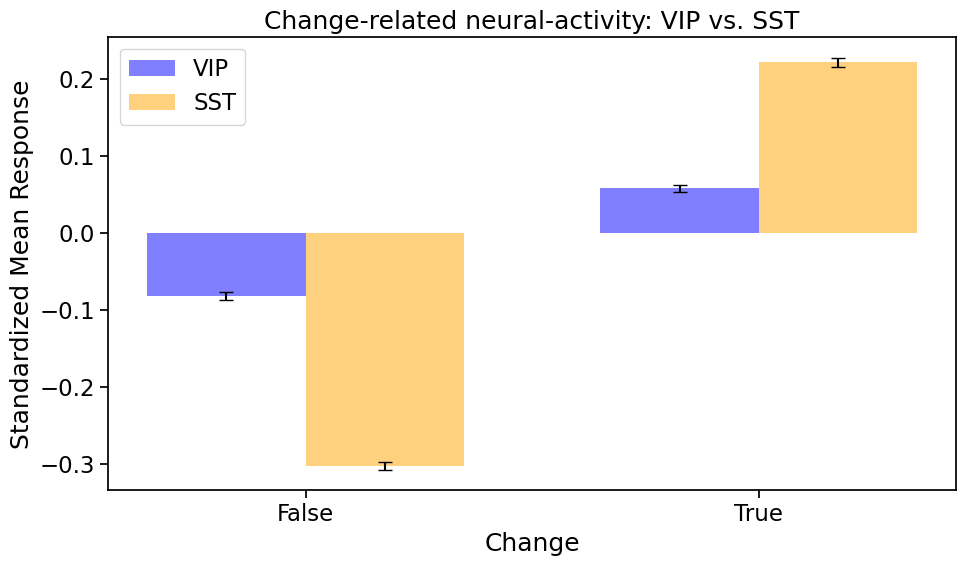

In [44]:
# visualize the change-related neural activity
plt.figure(figsize=(10, 6))

bar_width = 0.35
x = np.arange(len(change_vip['is_change']))

# vip
plt.bar(x - bar_width/2, change_vip['mean'], yerr=change_vip['sem'], 
        width=bar_width, label='VIP', color='blue', alpha=0.5, capsize=5)

# ssi
plt.bar(x + bar_width/2, change_sst['mean'], yerr=change_sst['sem'], 
        width=bar_width, label='SST', color='orange', alpha=0.5, capsize=5)

plt.xlabel('Change')
plt.ylabel('Standardized Mean Response')
plt.title('Change-related neural-activity: VIP vs. SST')
plt.xticks(x, ['False', 'True'])
plt.legend()
plt.tight_layout()
plt.show()

1. VIP neurons are less engaged when no change occurs, which aligns with their potential role in detecting behaviorally relevant stimuli.
When a change occurred, VIP neurons show a slight positive response. This indicates their activity increases slightly above baseline in response to stimulus changes.
2. When there was no change, SST neurons exhibit a strong negative response. This means their activity is substantially reduced below baseline in trials without changes.
SST neurons may suppress unnecessary activity during predictable, unchanging conditions, reflecting their role in regulating overall network dynamics.
When a change occurred, SST neurons show a strong positive response. They are highly responsive to stimulus changes, suggesting a prominent role in processing changes or maintaining network stability during unexpected events.
3. Overall, VIP neurons play a moderate role in detecting changes, showing smaller increases in activity during stimulus changes and less suppression during unchanging conditions.
On the other hand, SST neurons are more dynamic, with strong suppression during stable conditions and strong activation during changes. This suggests that SST neurons may act as regulators of network activity, responding robustly to both predictable and unexpected situations.

## Do VIP and SST neurons respond differently when visual stimuli are presented versus omitted?

As we know, various images were shown to the mice in the experiment. Sometimes the pictures were also omitted in order to introduce something unexpected into the experiment and thus also to analyze the reaction of the mice.
The following analysis investigates the differences in neural activity between conditions where visual stimuli (= images) are presented and where they are omitted. 
By comparing the mean responses of VIP and SST neurons in these scenarios, we aim to explore how these populations contribute to processing visual information and managing situations where expected stimuli are absent.

For this, as a first step we need to check how many different images were shown to the mice.
Overall there are 16 different images with different themes (e. g. animal images, which we have further analyzed in another notebook) and in severall cases the images where omitted.

In [45]:
# check how many different images there are
data["image_name"].value_counts()

image_name
omitted    61733
im031       6781
im106       6762
im045       6752
im054       6702
im073       6661
im075       6618
im000       6615
im035       6610
im085       4154
im061       4141
im077       4096
im062       4048
im065       4038
im066       4008
im069       3988
im063       3988
Name: count, dtype: int64

In [46]:
# combine all images as a supergroup to compare them to the omitted group
vip_data['stimulus_type'] = vip_data['image_name'].apply(lambda x: 'image' if x != 'omitted' else 'omitted')
sst_data['stimulus_type'] = sst_data['image_name'].apply(lambda x: 'image' if x != 'omitted' else 'omitted')

C:\Users\iside\AppData\Local\Temp\ipykernel_28744\2510113263.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vip_data['stimulus_type'] = vip_data['image_name'].apply(lambda x: 'image' if x != 'omitted' else 'omitted')
C:\Users\iside\AppData\Local\Temp\ipykernel_28744\2510113263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sst_data['stimulus_type'] = sst_data['image_name'].apply(lambda x: 'image' if x != 'omitted' else 'omitted')


In [47]:
# group the data by stimulus_type (image vs. omitted) and calculate the mean value, the standard deviation and the standard error
vip_summary = vip_data.groupby('stimulus_type')['standardized_response'].agg(['mean', 'std', 'count']).reset_index()
vip_summary['sem'] = vip_summary['std'] / (vip_summary['count'] ** 0.5)

sst_summary = sst_data.groupby('stimulus_type')['standardized_response'].agg(['mean', 'std', 'count']).reset_index()
sst_summary['sem'] = sst_summary['std'] / (sst_summary['count'] ** 0.5)


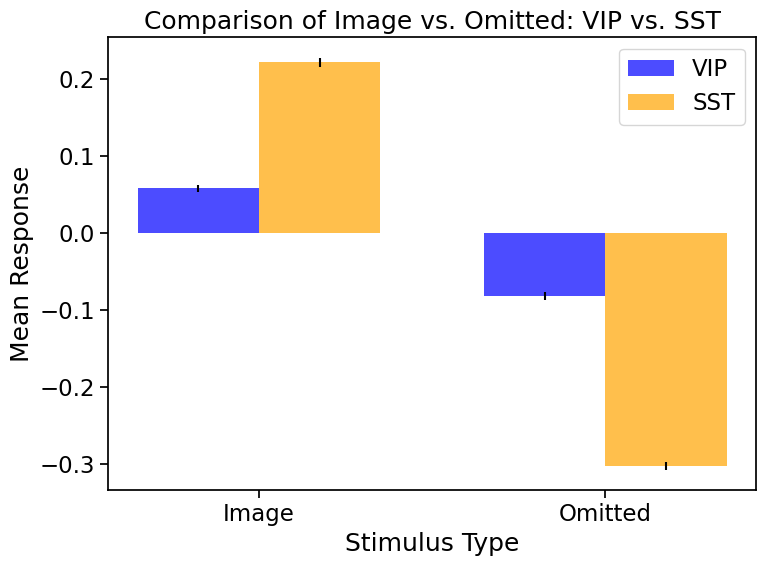

In [48]:
# plotting the comparison
x = np.arange(2) 
bar_width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x - bar_width / 2, vip_summary['mean'], yerr=vip_summary['sem'], width=bar_width, label='VIP', color='blue', alpha=0.7)
plt.bar(x + bar_width / 2, sst_summary['mean'], yerr=sst_summary['sem'], width=bar_width, label='SST', color='orange', alpha=0.7)

plt.xticks(x, ['Image', 'Omitted'])
plt.xlabel('Stimulus Type')
plt.ylabel('Mean Response')
plt.title('Comparison of Image vs. Omitted: VIP vs. SST')
plt.legend()
plt.tight_layout()
plt.show()

1. During trials where images were shown, VIP neurons exhibit a slight positive response (just above 0). 
This means their activity increases slightly above their baseline activity when visual stimuli are present.
VIP neurons are moderately responsive to the presence of visual stimuli, showing some activation but not as strong as SST neurons.
During omitted trials, VIP neurons reduce their activity when no stimulus is presented, but the response is not extreme.
2. SST neurons are highly responsive to the presence of visual stimuli, much more so than VIP neurons.
They strongly suppress their activity when no stimulus is shown, suggesting a regulatory or inhibitory role during periods of inactivity.
3. SST neurons show a much stronger response to visual stimuli compared to VIP neurons. This highlights their sensitivity to the presence of stimuli and their role in processing visual information.
Furthermore, SST neurons show a much stronger suppression of activity compared to VIP neurons when stimuli are omitted. VIP neurons remain closer to their baseline, indicating they are less affected by the absence of a stimulus.

## What is the difference in response latency between VIP and SST neurons?

In the context of sensory processing and behavioral responses, response latency — the time it takes for a mouse to react to a stimulus — provides insights into the functional roles of specific neural populations. 
By comparing response latencies, we aim to understand whether SST and VIP neurons contribute differently to the timing of behavioral responses.

The boxplot shows the response latency for VIP and SST neurons, defined as the time it took the mouse to lick after the onset of a stimulus. 

C:\Users\iside\AppData\Local\Temp\ipykernel_28744\174807447.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_data, x="Neuron Type", y="Response Latency", palette=["blue", "orange"])


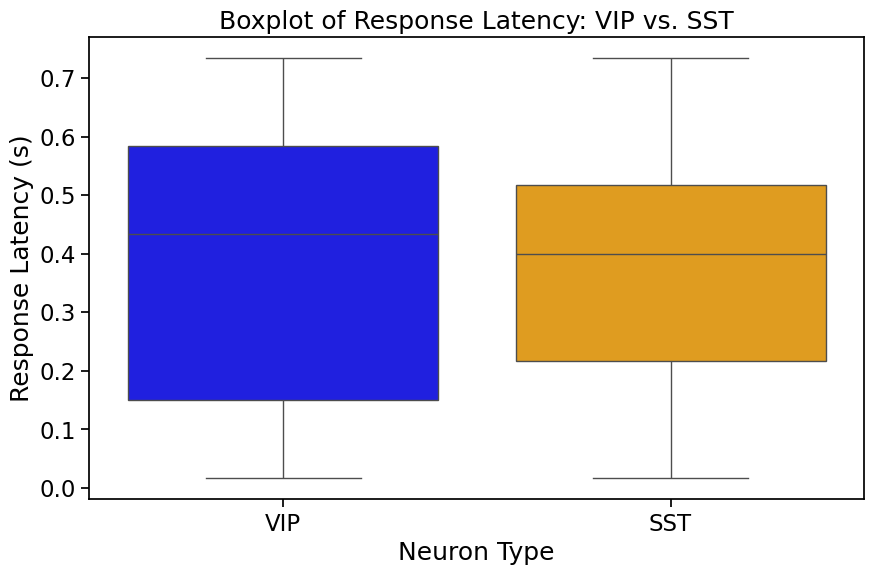

In [58]:
# plotting differences as box plot
plt.figure(figsize=(10, 6))
combined_data = pd.DataFrame({
    "Response Latency": np.concatenate([vip_data['response_latency'], sst_data['response_latency']]),
    "Neuron Type": ["VIP"] * len(vip_data['response_latency']) + ["SST"] * len(sst_data['response_latency'])
})
sns.boxplot(data=combined_data, x="Neuron Type", y="Response Latency", palette=["blue", "orange"])
plt.title("Boxplot of Response Latency: VIP vs. SST")
plt.ylabel("Response Latency (s)")
plt.show()


Median Response Latency:
- VIP neurons: The median latency of is approximately 0.45 seconds, indicating that VIP neurons are associated with slightly slower behavioral responses.
- SST neurons: The median latency is approximately 0.38 seconds, suggesting that SST neurons are associated with faster behavioral responses.
- SST neurons are linked to quicker responses compared to VIP neurons.

Interquartile Range:
- The IQR for VIP neurons indicate a slightly broader variability in latency.
- The IQR for SST neurons suggest a narrower and more consistent latency distribution.
- Interpretation: SST neurons are associated with more consistent and faster response times, while VIP neurons exhibit slightly more variability.

SST neurons likely play a role in initiating quicker responses or enhancing behavioral readiness, possibly due to their involvement in early sensory processing or network modulation.
VIP neurons may contribute to more delayed or specific responses, potentially reflecting their role in selective attention or reinforcement of behaviorally relevant stimuli.

Showing variability and frequency of different latency ranges with a density plot:

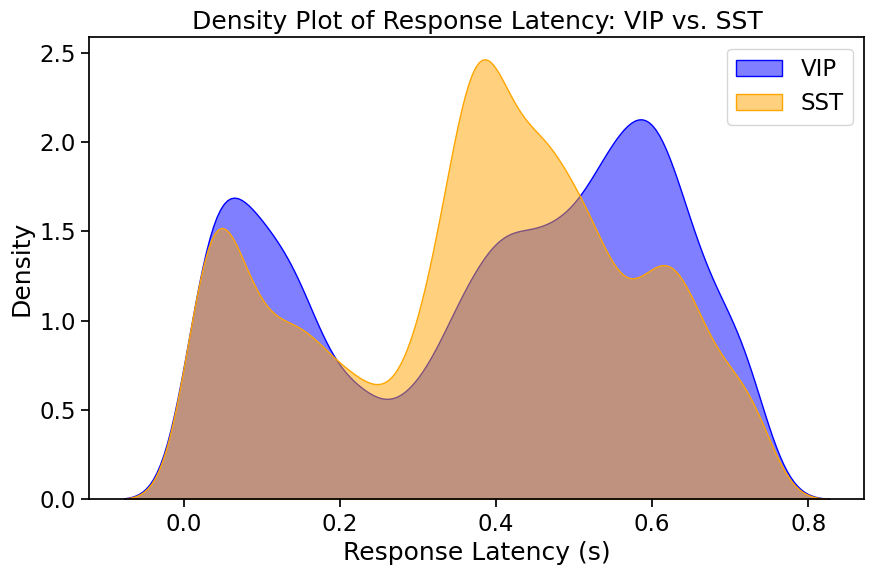

In [57]:
plt.figure(figsize=(10, 6))
sns.kdeplot(vip_data['response_latency'], label="VIP", color="blue", fill=True, alpha=0.5)
sns.kdeplot(sst_data['response_latency'], label="SST", color="orange", fill=True, alpha=0.5)
plt.xlabel("Response Latency (s)")
plt.ylabel("Density")
plt.title("Density Plot of Response Latency: VIP vs. SST")
plt.legend()
plt.show()

- SST neurons are associated with shorter response latencies and more consistent responses.
This suggests that SST neurons may play a role in fast processing and behavioral readiness, potentially by regulating network activity and inhibiting irrelevant signals.
- VIP neurons show greater variability and are more often associated with longer response latencies.
This suggests that VIP neurons might contribute to later-stage processing, such as amplifying behaviorally relevant signals or selective attention.
- Both VIP and SST neurons have a first peak at short latencies (~0.1-0.2 seconds), showing that both populations can contribute to early responses.
However, VIP neurons show a stronger association with later responses, highlighting their distinct functional role.
VIP neurons may contribute to the sustained processing of reward-related stimuli, ensuring that the mouse processes and responds to the relevant stimulus with a licking behavior. SST neurons, on the other hand, may modulate early inhibition and rapid behavioral readiness, enabling faster initial responses.